In [265]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [110]:
file = pd.read_csv (r'credit_scoring.csv', sep = ';', quotechar="'", dtype = int)
file

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9,1,60,30,0,1,1,73,129,0,0,800,846,1
1,17,1,60,58,1,1,0,48,131,0,0,1000,1658,1
2,10,0,36,46,0,2,1,90,200,3000,0,2000,2985,0
3,0,1,60,24,1,1,0,63,182,2500,0,900,1325,1
4,0,1,36,26,1,1,0,46,107,0,0,310,910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1,1,60,39,0,1,0,69,92,0,0,900,1020,0
4371,22,0,60,46,0,1,0,60,75,3000,600,950,1263,1
4372,0,0,24,37,0,1,1,60,90,3500,0,500,963,0
4373,0,1,48,23,1,1,1,49,140,0,0,550,550,1


In [111]:
file = file.values
print(file)

[[   9    1   60 ...  800  846    1]
 [  17    1   60 ... 1000 1658    1]
 [  10    0   36 ... 2000 2985    0]
 ...
 [   0    0   24 ...  500  963    0]
 [   0    1   48 ...  550  550    1]
 [   5    0   60 ... 1350 1650    1]]


In [241]:
data = file[:, :13]
status = file[:, 13:14]
print("les variables X =\n", data)
print("\n")
print("les variables y =\n", status)

les variables X =
 [[   9    1   60 ...    0  800  846]
 [  17    1   60 ...    0 1000 1658]
 [  10    0   36 ...    0 2000 2985]
 ...
 [   0    0   24 ...    0  500  963]
 [   0    1   48 ...    0  550  550]
 [   5    0   60 ... 1000 1350 1650]]


les variables y =
 [[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


In [113]:
print("la taille du tableau des données est : ", data.shape)
print("la taille du tableau de la variable status est : ", status.shape)

la taille du tableau des données est :  (4375, 13)
la taille du tableau de la variable status est :  (4375, 1)


le nombre de cas negatifs =  [1216.]
le nombre de cas positifs =  [3159.]


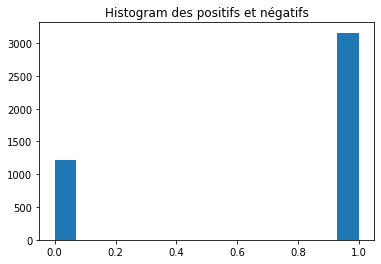

In [114]:
x, bins, bars = plt.hist(status, bins='auto')
print("le nombre de cas negatifs = ", x[:1])
print("le nombre de cas positifs = ", x[13:14])
plt.title("Histogram des positifs et négatifs")
plt.savefig("Histogram.png")
plt.show()

In [236]:
X_train, X_test, y_train, y_test = train_test_split(data, status, test_size=0.3)
print("les données de training sont les suivantes :\n")
print("X_train =\n", X_train)
print("\n")
print("y_train =\n", y_train)
print("\nles données de test sont les suivantes :\n")
print("X_test =\n", X_test)
print("\n")
print("y_test =\n", y_test)
print("\n")
print ("la taille des données de training est: X_train =", X_train.shape, "y =", y_train.shape)
print ("la taille des données de test est: X_test =", X_test.shape, "y =", y_test.shape)

les données de training sont les suivantes :

X_train =
 [[   5    1   36 ...    0  850  870]
 [   4    1   36 ...    0 1000 1218]
 [   2    1   60 ...    0 1000 1000]
 ...
 [   1    0   60 ... 4500 1650 2060]
 [   1    1   60 ...    0  500 1300]
 [   4    1   48 ...    0  700  814]]


y_train =
 [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]

les données de test sont les suivantes :

X_test =
 [[   1    1   36 ...    0  600  975]
 [   6    1   18 ...    0  600 2724]
 [   4    0   60 ... 1200  950 1050]
 ...
 [  15    0   12 ...    0  200 1240]
 [   0    0   48 ...    0  760  860]
 [   0    0   48 ...    0 1100 1660]]


y_test =
 [[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


la taille des données de training est: X_train = (3062, 13) y = (3062, 1)
la taille des données de test est: X_test = (1313, 13) y = (1313, 1)


In [234]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print("le score est de =", round(accuracy_score(clf_pred, y_test)*100
, 2), "%")

le score est de = 72.2 %


In [233]:
graph_data = tree.export_graphviz(clf, out_file=None,  
           filled=True, rounded=True,  
           special_characters=True)  
graph = graphviz.Source(graph_data) 
graph.render("tree")
#graph

'tree.pdf'

In [245]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn = knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("le score est de =", round(accuracy_score(knn_pred, y_test)*100
, 2), "%")

le score est de = 74.41 %


In [248]:
scaled_file = StandardScaler().fit_transform(file)
print(scaled_file)

[[ 0.12417212  0.94505019  0.92225348 ... -0.50556494 -0.98717625
   0.62042884]
 [ 1.10300637  0.94505019  0.92225348 ... -0.07976109  0.31890958
   0.62042884]
 [ 0.2465264  -1.05814486 -0.71960165 ...  2.04925815  2.45336265
  -1.6117884 ]
 ...
 [-0.97701642 -1.05814486 -1.54052921 ... -1.14427071 -0.79898408
  -1.6117884 ]
 [-0.97701642  0.94505019  0.10132592 ... -1.03781975 -1.46328636
   0.62042884]
 [-0.36524501 -1.05814486  0.92225348 ...  0.66539564  0.30604174
   0.62042884]]


In [250]:
scaled_data = scaled_file[:, :13]
scaled_status = scaled_file[:, 13:14]
print("les variables X =\n", scaled_data)
print("\n")
print("les variables y =\n", scaled_status)

les variables X =
 [[ 0.12417212  0.94505019  0.92225348 ... -0.28136029 -0.50556494
  -0.98717625]
 [ 1.10300637  0.94505019  0.92225348 ... -0.28136029 -0.07976109
   0.31890958]
 [ 0.2465264  -1.05814486 -0.71960165 ... -0.28136029  2.04925815
   2.45336265]
 ...
 [-0.97701642 -1.05814486 -1.54052921 ... -0.28136029 -1.14427071
  -0.79898408]
 [-0.97701642  0.94505019  0.10132592 ... -0.28136029 -1.03781975
  -1.46328636]
 [-0.36524501 -1.05814486  0.92225348 ...  0.54000599  0.66539564
   0.30604174]]


les variables y =
 [[ 0.62042884]
 [ 0.62042884]
 [-1.6117884 ]
 ...
 [-1.6117884 ]
 [ 0.62042884]
 [ 0.62042884]]


In [257]:
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_data, scaled_status, test_size=0.3)
print("les données de training sont les suivantes :\n")
print("scaled_X_train =\n", scaled_X_train)
print("\n")
print("scaled_y_train =\n", scaled_y_train)
print("\nles données de test sont les suivantes :\n")
print("scaled_X_test =\n", scaled_X_test)
print("\n")
print("scaled_y_test =\n", scaled_y_test)
print("\n")
print ("la taille des données de training est: scaled_X_train =", X_train.shape, "y =", y_train.shape)
print ("la taille des données de test est: scaled_X_test =", X_test.shape, "y =", y_test.shape)

les données de training sont les suivantes :

scaled_X_train =
 [[ 0.61358925 -1.05814486  0.92225348 ... -0.28136029  0.04798006
   0.46688975]
 [ 1.10300637 -1.05814486 -2.36145678 ... -0.28136029 -1.35717263
  -0.00922036]
 [ 0.61358925  0.94505019 -0.71960165 ... -0.28136029 -1.14427071
  -1.06116633]
 ...
 [-0.48759929  0.94505019  0.92225348 ... -0.28136029 -0.82491782
  -0.62687671]
 [-0.36524501  0.94505019 -1.54052921 ... -0.28136029 -1.51684908
  -1.66434637]
 [-0.97701642 -1.05814486  0.10132592 ...  0.06361355  2.04925815
   1.50757636]]


scaled_y_train =
 [[ 0.62042884]
 [ 0.62042884]
 [ 0.62042884]
 ...
 [ 0.62042884]
 [ 0.62042884]
 [-1.6117884 ]]

les données de test sont les suivantes :

scaled_X_test =
 [[-4.87599294e-01  9.45050190e-01  9.22253481e-01 ... -2.81360285e-01
   2.66898718e-02  1.13024127e-01]
 [-7.32307858e-01  9.45050190e-01  9.22253481e-01 ...  3.00410482e+00
   4.52493720e-01 -1.76502288e-01]
 [ 2.08184063e+00  9.45050190e-01  9.22253481e-01 ... -2.8

In [273]:
lab_enc = preprocessing.LabelEncoder()
scaled_y_train = lab_enc.fit_transform(scaled_y_train)

scaled_clf = clf.fit(scaled_X_train, scaled_y_train)
scaled_clf_pred = scaled_clf.predict(scaled_X_test)
print("le score est de =", round(accuracy_score(scaled_clf_pred, y_test)*100
, 2), "%")

le score est de = 61.92 %


In [275]:
scaled_knn = knn.fit(scaled_X_train, scaled_y_train)
scaled_knn_pred = scaled_knn.predict(scaled_X_test)
print("le score est de =", round(accuracy_score(scaled_knn_pred, y_test)*100
, 2), "%")

le score est de = 65.04 %
